## Website Traffic Analysis by Anshika Gupta

question link: https://platform.stratascratch.com/data-projects/website-traffic-analysis

The goal of this project is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas how to increase the links' clickrates. With that in mind, please analyze the data using the Python libraries Pandas and SciPy where indicated, providing answers to the presented questions:

[Pandas] How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

[Pandas] What about the other recorded events?

[Pandas] Which countries did the pageviews come from?

[Pandas] What was the overall click rate (clicks/pageviews)?

[Pandas] How does the clickrate distribute across different links?

[Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

### Data Description

The data set provided (traffic.csv) contains web traffic data ("events") from a few different pages ("links") over a period of 7 days including various categorical dimensions about the geographic origin of that traffic as well as a page's content: isrc.

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

In [224]:
df = pd.read_csv("traffic.csv")
df

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...,...
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


In [221]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [68]:
df['date'] = pd.to_datetime(df['date'])

In [73]:
df.isna().sum()

event      0
date       0
country    0
city       0
artist     0
album      0
track      0
isrc       0
linkid     0
dtype: int64

### Data Imputation

Given the size of the dataset and the sum of null values, I choose to use dropna as it is not significantly impacting our given dataset record count.

In [70]:
df.isrc.fillna(-1, inplace=True)

In [72]:
df = df.dropna()

### 1. How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [198]:
c = df.event.value_counts()
c

event
pageview    141980
click        55720
preview      28530
Name: count, dtype: int64

In [121]:
perday_pv = pd.DataFrame(df[df.event =='pageview'].groupby('date')['event'].value_counts())
perday_pv

,,count
date,event,
2021-08-19,pageview,22356
2021-08-20,pageview,21368
2021-08-21,pageview,21349
2021-08-22,pageview,20430
2021-08-23,pageview,18645
2021-08-24,pageview,18685
2021-08-25,pageview,19147


In [122]:
# Extract dates from MultiIndex
dates_only = perday_pv.index.get_level_values('date')

# Display dates only
print(dates_only)


DatetimeIndex(['2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22',
               '2021-08-23', '2021-08-24', '2021-08-25'],
              dtype='datetime64[ns]', name='date', freq=None)


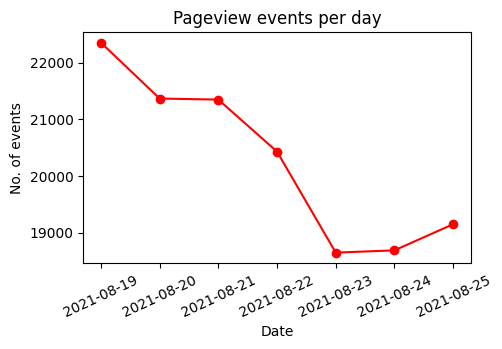

In [123]:
plt.figure(figsize=(5,3))
plt.title("Pageview events per day")
plt.plot(dates_only, perday_pv.values,'-ro')

plt.xticks(rotation=25)
plt.xlabel("Date")
plt.ylabel("No. of events")
plt.show()

### 2. What about the other recorded events? 

DatetimeIndex(['2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22',
               '2021-08-23', '2021-08-24', '2021-08-25'],
              dtype='datetime64[ns]', name='date', freq=None)
DatetimeIndex(['2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22',
               '2021-08-23', '2021-08-24', '2021-08-25'],
              dtype='datetime64[ns]', name='date', freq=None)


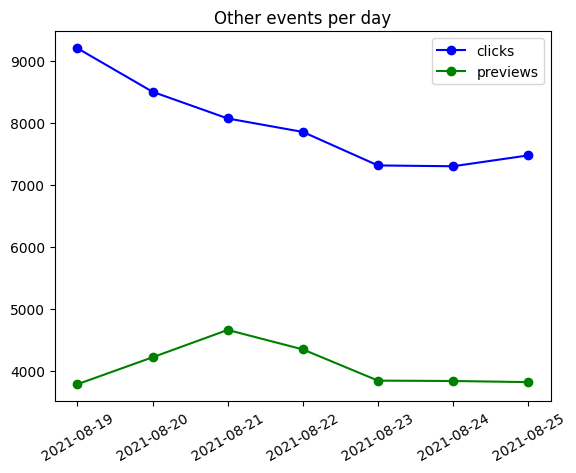

In [165]:
#CLICKS
perday_c = pd.DataFrame(df[df.event =='click'].groupby('date')['event'].value_counts())
perday_c

# Extract dates from MultiIndex
dates_only = perday_c.index.get_level_values('date')

# Display dates only
print(dates_only)


#PREVIEW
perday_prev = pd.DataFrame(df[df.event =='preview'].groupby('date')['event'].value_counts())
perday_prev

# Extract dates from MultiIndex
dates_only = perday_prev.index.get_level_values('date')

# Display dates only
print(dates_only)


plt.title("Other events per day")
plt.plot(dates_only, perday_c.values,'-bo', label='clicks')
plt.plot(dates_only, perday_prev.values,'-go', label='previews')
plt.legend(loc="upper right")
plt.xticks(rotation=30)
plt.show()

### Which countries did the pageviews come from?

In [177]:
pv_country = pd.DataFrame(df[df.event =='pageview'].groupby('country')['event'].value_counts())
pv_country

,,count
country,event,
Afghanistan,pageview,2
Albania,pageview,344
Algeria,pageview,443
American Samoa,pageview,3
Andorra,pageview,2
...,...,...
Wallis and Futuna,pageview,1
Yemen,pageview,49
Zambia,pageview,68


In [186]:
pv_country = pv_country.sort_values('count', ascending=False)

Index(['Saudi Arabia', 'India', 'United States', 'France', 'Iraq',
       'United Kingdom', 'Pakistan', 'Germany', 'Turkey',
       'United Arab Emirates',
       ...
       'Samoa', 'Sint Maarten', 'Guinea-Bissau', 'Guernsey', 'Lesotho',
       'Central African Republic', 'Wallis and Futuna',
       'Principality of Monaco', 'Saint Martin', 'Solomon Islands'],
      dtype='object', name='country', length=211)


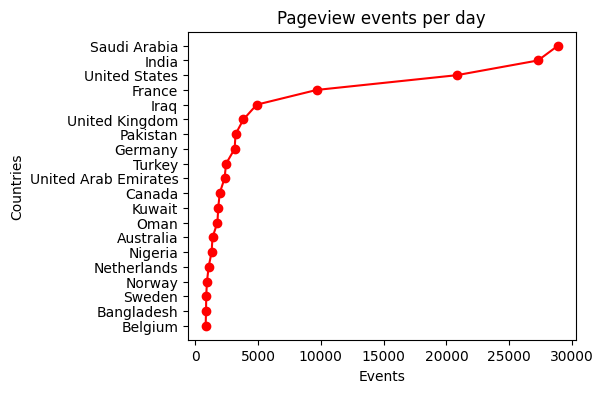

In [197]:
# Extract dates from MultiIndex
countries = pv_country.index.get_level_values('country')

# Display dates only
print(countries)

plt.figure(figsize=(5,4))
plt.title("Pageview events per day")
plt.plot(pv_country.values[:20],countries[:20],'-ro')

# plt.xticks(rotation=90)
plt.xlabel("Events")
plt.ylabel("Countries")

plt.gca().invert_yaxis()
plt.show()

### 4. What was the overall click rate (clicks/pageviews)?

In [199]:
c

event
pageview    141980
click        55720
preview      28530
Name: count, dtype: int64

In [201]:
clickrate = c.click/c.pageview
clickrate

0.3924496407944781

### 5. How does the clickrate distribute across different links?

In [202]:
df.linkid.value_counts()

linkid
2d896d31-97b6-4869-967b-1c5fb9cd4bb8    40841
522da5cc-8177-4140-97a7-a84fdb4caf1c    10314
e849515b-929d-44c8-a505-e7622f1827e9     9750
c2c876ab-b093-4750-9449-6b4913da6af3     6733
681d888a-59ce-4acb-b7c5-95dab0c063d9     5512
                                        ...  
ff1ec49a-c80e-5bd3-aee3-ac51992b2b63        1
7e614c15-2b7f-5155-b27d-fe0b3a849eb4        1
e1d532fe-393a-5ecd-9bd0-fbf210af1443        1
86d00047-716b-5a55-9344-64aebd8f29e1        1
ac33e71b-209d-5503-a276-14ca46372a81        1
Name: count, Length: 3822, dtype: int64

In [204]:
link_c = pd.DataFrame(df[df.event =='click'].groupby('linkid')['event'].value_counts())
link_c

,,count
linkid,event,
00126b32-0c35-507b-981c-02c80d2aa8e7,click,2
004b9724-abca-5481-b6e9-6148a7ca00a5,click,1
0063a982-41cd-5629-96d0-e1c4dd72ea11,click,2
006af6a0-1f0d-4b0c-93bf-756af9071c06,click,8
00759b81-3f04-4a61-b934-f8fb3185f4a0,click,3
...,...,...
ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,click,29
fff38ca0-8043-50cd-a5f1-f65ebb7105c5,click,1
fff84c0e-90a1-59d8-9997-adc909d50e16,click,1


In [205]:
link_p = pd.DataFrame(df[df.event =='pageview'].groupby('linkid')['event'].value_counts())
link_p

,,count
linkid,event,
00073307-ae96-5089-a117-4783afb42f8e,pageview,2
00126b32-0c35-507b-981c-02c80d2aa8e7,pageview,2
0018cfff-50a1-5984-9715-01ef2d11a49a,pageview,1
0033934b-5d16-5a06-af58-d087bcdd3680,pageview,1
0034d6cf-3bd8-5ffe-aafc-b3959fc48608,pageview,1
...,...,...
fff38ca0-8043-50cd-a5f1-f65ebb7105c5,pageview,1
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7,pageview,2
fff84c0e-90a1-59d8-9997-adc909d50e16,pageview,1


In [207]:
merged = pd.merge(link_c, link_p, on='linkid')

In [208]:
merged['click_rate'] = merged['count_x']/merged['count_y']

In [209]:
merged

,count_x,count_y,click_rate
linkid,,,
00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...
ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000


### 6. Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect?  

Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables

In [215]:
link_pr = pd.DataFrame(df[df.event =='preview'].groupby('linkid')['event'].value_counts())
link_pr

,,count
linkid,event,
006af6a0-1f0d-4b0c-93bf-756af9071c06,preview,11
00759b81-3f04-4a61-b934-f8fb3185f4a0,preview,1
00829040-ee01-4409-966d-d67c7965144a,preview,9
00de7566-f014-4d20-8616-82e4dea45b88,preview,1
0211bf4d-0e9d-46c2-889c-f97872280820,preview,141
...,...,...
fd647d87-4c7a-4dd1-92c6-0e7dd7fdf4f1,preview,101
fe24ad63-e347-40db-8e75-94e573bd3d9b,preview,1
fe8a3fcd-7beb-4db0-8494-5238e1e1cab3,preview,57


In [216]:
merged = pd.merge(merged, link_pr, on='linkid')

In [217]:
merged

,count_x,count_y,click_rate,count
linkid,,,,
006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222,11
00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000,1
00829040-ee01-4409-966d-d67c7965144a,22,39,0.564103,9
00de7566-f014-4d20-8616-82e4dea45b88,1,5,0.200000,1
0211bf4d-0e9d-46c2-889c-f97872280820,123,563,0.218472,141
...,...,...,...,...
fd647d87-4c7a-4dd1-92c6-0e7dd7fdf4f1,271,652,0.415644,101
fe24ad63-e347-40db-8e75-94e573bd3d9b,9,17,0.529412,1
fe8a3fcd-7beb-4db0-8494-5238e1e1cab3,118,405,0.291358,57


In [218]:
merged['count_x'].corr(merged['count']) #click and preview

0.9934221977837883

In [220]:
from scipy.stats import pearsonr, pointbiserialr

# Calculate Pearson correlation coefficient for clicks and previews
pearson_corr, pearson_p_value = pearsonr(merged['count_x'], merged['count'])

# Calculate point-biserial correlation for binary relationship
binary_corr, binary_p_value = pointbiserialr(merged['count_x'], merged['count'] > 0)

# Display the results
print("Pearson correlation coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p_value)

Pearson correlation coefficient: 0.9934221977837862
Pearson p-value: 0.0


### From the above results we can conclude that there is a strong correlation between the clicks and previews for a link as they are dependent events.

In [225]:
# Encode categorical variables into numerical format using pd.factorize()
df['country_en'] = pd.factorize(df['country'])[0]
df['city_en'] = pd.factorize(df['city'])[0]
df['artist_en'] = pd.factorize(df['artist'])[0]
df['album_en'] = pd.factorize(df['album'])[0]
df['track_en'] = pd.factorize(df['track'])[0]

# Display the encoded DataFrame
# print(df[['country_encoded', 'city_encoded', 'artist_encoded', 'album_encoded', 'track_encoded']])

# Calculate correlation matrix
correlation_matrix = df[['country_en', 'city_en', 'artist_en', 'album_en', 'track_en']].corr()

# Display correlation matrix
print(correlation_matrix)

            country_en   city_en  artist_en  album_en  track_en
country_en    1.000000  0.188101   0.010852  0.006472  0.005394
city_en       0.188101  1.000000   0.088732  0.095431  0.097308
artist_en     0.010852  0.088732   1.000000  0.901881  0.875746
album_en      0.006472  0.095431   0.901881  1.000000  0.963166
track_en      0.005394  0.097308   0.875746  0.963166  1.000000


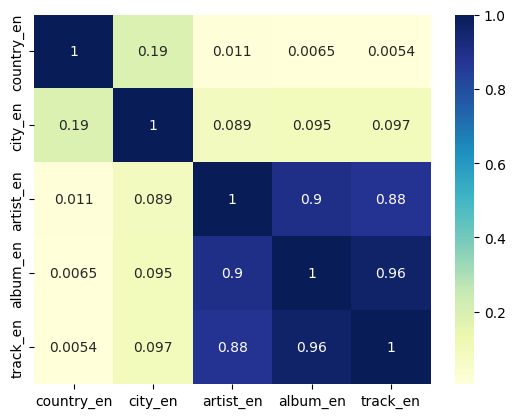

In [228]:
# plotting correlation heatmap 
dataplot = sb.heatmap(correlation_matrix, cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

We can observe the correlation between the categorical variables from the above heatmap. 